Gli outlier sono valori anomali che si distaccano notevolmente dalla normale distribuzione dei dati. Questi valori "fuori scala" possono influenzare drasticamente le previsioni di un modello statistico e vengono gestiti proprio per questo.

Questa funzione calcola_deviazione_standard calcola la deviazione standard di una lista di numeri utilizzando la formula matematica corrispondente. Innanzitutto, la funzione calcola la media dei numeri nella lista. Successivamente, calcola la somma dei quadrati delle differenze tra ciascun numero nella lista e la media calcolata in precedenza. Infine, divide questa somma per il numero totale di elementi nella lista e ne calcola la radice quadrata per ottenere la deviazione standard. La deviazione standard è una misura della dispersione dei dati intorno alla media: maggiore è la deviazione standard, maggiore è la dispersione dei dati. Dopo aver definito la funzione, viene mostrato un esempio di utilizzo in cui viene passata una lista di numeri [1, 2, 3, 4, 5] alla funzione calcola_deviazione_standard, e il risultato viene stampato a schermo.

In [2]:
def calcola_deviazione_standard(lista):
    n = len(lista)
    
    # la formula è: σ = √(Σ(xi - x̄)² / n)
    # √ = radice quadrata
    # Σ = sommatoria di tutti gli elementi dentro la parentesi quadra
    # xi = sono i singoli valori dei dati
    # x̄ = è la media dei dati
    # n = è il numero totale di dati
    
    # Calcola la media
    media = sum(lista) / n
    
    # Calcola la somma dei quadrati delle differenze dalla media
    somma_quadrati_diff = sum((x - media) ** 2 for x in lista)
    
    # Calcola la deviazione standard
    deviazione_standard = (somma_quadrati_diff / n) ** 0.5
    
    return deviazione_standard

# Esempio di utilizzo
numero_lista = [1, 2, 3, 4, 5]
deviazione_standard = calcola_deviazione_standard(numero_lista)

# Stampa il risultato
print(f"La deviazione standard della lista è: {deviazione_standard}")

La deviazione standard della lista è: 1.4142135623730951


Questo codice utilizza la libreria pandas per creare un DataFrame di esempio chiamato df contenente una colonna chiamata 'Valori' con una serie di valori. Successivamente, calcola la media e la deviazione standard dei valori nella colonna 'Valori' utilizzando i metodi mean() e std() rispettivamente. Infine, stampa la deviazione standard calcolata.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt

# Crea un DataFrame di esempio
data = {'Valori': [1, 2, 3, 4, 5, 10, 15, 20, 25, 300, 1000, 100000000, -50000000, -50]}
df = pd.DataFrame(data)
# Lista con outliers da entrambi i lati

# Calcola la media e la deviazione standard
mean_value = df['Valori'].mean()
std_dev = df['Valori'].std()
std_dev

30786384.39895254

Questo codice identifica gli outliers nel DataFrame originale considerando i valori che si trovano oltre 3 deviazioni standard dalla media. Per prima cosa, crea un DataFrame chiamato "outliers" che contiene solo le righe del DataFrame originale (df) in cui il valore della colonna "Valori" è superiore a 3 deviazioni standard sopra la media (mean_value + 3 * std_dev) o inferiore a 3 deviazioni standard sotto la media (mean_value - 3 * std_dev). Infine, visualizza il DataFrame "outliers" che contiene solo i valori considerati outliers. Questo metodo è utile per l'appunto per identificare e rimuovere dati anomali o non rappresentativi che potrebbero influenzare negativamente l'analisi o i modelli di machine learning.

In [4]:
#Identifica gli outliers consiederando +3 sigma dalla media
outliers=df[(df["Valori"]>mean_value+3*std_dev) | (df["Valori"]<mean_value-3*std_dev)]
outliers

,Valori
11,100000000


Questo codice crea un grafico a dispersione (scatter plot) con i valori presenti nel DataFrame df. Successivamente, evidenzia gli outliers nel grafico utilizzando un colore rosso per i punti corrispondenti agli outliers, i quali sono presumibilmente individuati in un DataFrame chiamato outliers. Inoltre, aggiunge al grafico la linea della media dei valori (mean_value) e le linee corrispondenti a più o meno 3 deviazioni standard dalla media, utilizzando linee tratteggiate verdi e arancioni rispettivamente. Infine, vengono aggiunte etichette agli assi, un titolo al grafico e una legenda che spiega i diversi elementi presenti nel grafico. Il grafico risultante mostra la distribuzione dei valori nel DataFrame df, evidenziando gli outliers e indicando la media e la deviazione standard dei valori.

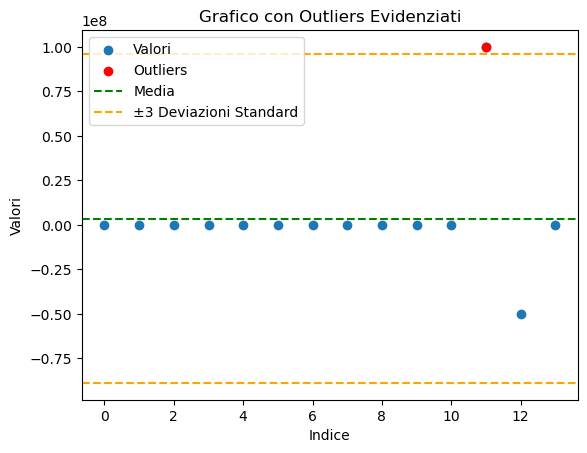

In [5]:
# Crea un grafico a dispersione
plt.scatter(df.index, df['Valori'], label='Valori')

# Evidenzia gli outliers nel grafico con un colore diverso
plt.scatter(outliers.index, outliers['Valori'], color='red', label='Outliers')

# Aggiungi la media e la deviazione standard al grafico
plt.axhline(y=mean_value, color='green', linestyle='--', label='Media')
plt.axhline(y=mean_value + 3 * std_dev, color='orange', linestyle='--', label='±3 Deviazioni Standard')
plt.axhline(y=mean_value - 3 * std_dev, color='orange', linestyle='--')

# Aggiungi etichette e legenda al grafico
plt.xlabel('Indice')
plt.ylabel('Valori')
plt.title('Grafico con Outliers Evidenziati')
plt.legend()

# Mostra il grafico
plt.show()

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Crea un DataFrame di esempio con 4 features
data = {'Feature1': [1, 200, 3, 4, 50000, 10, 15, 20, 2500000, 300000000, 100000000],
        'Feature2': [2, 4, 6, 8, 10, 20, 30, 40, 500, 60, 200],
        'Feature3': [5, 10, 15, 20000, 25, 50, 75, 100, 125, 150, 500000],
        'Feature4': [1, -200000, 3, 4000000000, 5, 10, 15, 20, 200, 30, 10000]}

df = pd.DataFrame(data)

# Definisci il numero minimo di features che devono superare la soglia per considerare un dato un outlier
min_features_threshold = 1
k=3 #intervallo di confidenza 

# Lista per salvare gli indici degli outliers
outlier_indices = []

# Itera su ogni feature
for feature in df.columns:
    mean_value = df[feature].mean()
    std_dev = df[feature].std()    
    # Identifica gli outliers per ciascuna feature
    df['Outlier_' + feature] = (df[feature] > mean_value + k * std_dev) | (df[feature] < mean_value - k * std_dev)
df

,Feature1,Feature2,Feature3,Feature4,Outlier_Feature1,Outlier_Feature2,Outlier_Feature3,Outlier_Feature4
0,1,2,5,1,False,False,False,False
1,200,4,10,-200000,False,False,False,False
2,3,6,15,3,False,False,False,False
3,4,8,20000,4000000000,False,False,False,True
4,50000,10,25,5,False,False,False,False
5,10,20,50,10,False,False,False,False
6,15,30,75,15,False,False,False,False
7,20,40,100,20,False,False,False,False
8,2500000,500,125,200,False,False,False,False
9,300000000,60,150,30,False,False,False,False


In [7]:
#Elimina le righe corrispondenti agli outliers quelli che hanno una features fuoriscala
outliers = df['Num_Outliers'] = df.filter(like='Outlier_').sum(axis=1)
df

,Feature1,Feature2,Feature3,Feature4,Outlier_Feature1,Outlier_Feature2,Outlier_Feature3,Outlier_Feature4,Num_Outliers
0,1,2,5,1,False,False,False,False,0
1,200,4,10,-200000,False,False,False,False,0
2,3,6,15,3,False,False,False,False,0
3,4,8,20000,4000000000,False,False,False,True,1
4,50000,10,25,5,False,False,False,False,0
5,10,20,50,10,False,False,False,False,0
6,15,30,75,15,False,False,False,False,0
7,20,40,100,20,False,False,False,False,0
8,2500000,500,125,200,False,False,False,False,0
9,300000000,60,150,30,False,False,False,False,0


In [8]:
# Aggiungi una colonna che indica se il record è un outlier o meno
df['Is_Outlier'] = df.index.isin(outliers.index)
df

,Feature1,Feature2,Feature3,Feature4,Outlier_Feature1,Outlier_Feature2,Outlier_Feature3,Outlier_Feature4,Num_Outliers,Is_Outlier
0,1,2,5,1,False,False,False,False,0,True
1,200,4,10,-200000,False,False,False,False,0,True
2,3,6,15,3,False,False,False,False,0,True
3,4,8,20000,4000000000,False,False,False,True,1,True
4,50000,10,25,5,False,False,False,False,0,True
5,10,20,50,10,False,False,False,False,0,True
6,15,30,75,15,False,False,False,False,0,True
7,20,40,100,20,False,False,False,False,0,True
8,2500000,500,125,200,False,False,False,False,0,True
9,300000000,60,150,30,False,False,False,False,0,True


In [9]:
# Rimuovi colonne ausiliarie
df.drop(df.filter(like='Outlier_').columns, axis=1, inplace=True)
df.drop('Num_Outliers', axis=1, inplace=True)
df

,Feature1,Feature2,Feature3,Feature4,Is_Outlier
0,1,2,5,1,True
1,200,4,10,-200000,True
2,3,6,15,3,True
3,4,8,20000,4000000000,True
4,50000,10,25,5,True
5,10,20,50,10,True
6,15,30,75,15,True
7,20,40,100,20,True
8,2500000,500,125,200,True
9,300000000,60,150,30,True


In [56]:
df_filtered = df[df['Is_Outlier'] == False ]
df_filtered

,Feature1,Feature2,Feature3,Feature4,Is_Outlier


In [11]:
df_filtered = df[df['Is_Outlier'] == True ]
df_filtered

,Feature1,Feature2,Feature3,Feature4,Is_Outlier
0,1,2,5,1,True
1,200,4,10,-200000,True
2,3,6,15,3,True
3,4,8,20000,4000000000,True
4,50000,10,25,5,True
5,10,20,50,10,True
6,15,30,75,15,True
7,20,40,100,20,True
8,2500000,500,125,200,True
9,300000000,60,150,30,True


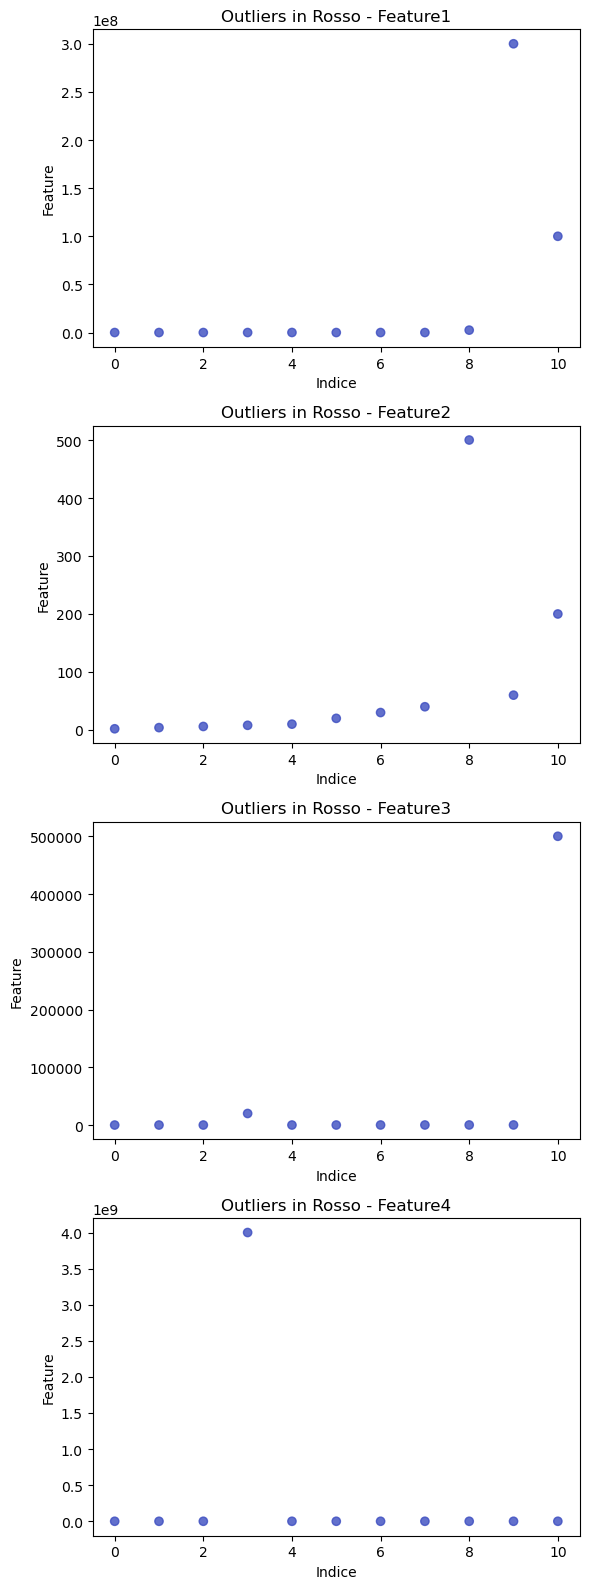

In [12]:
# Organizza i grafici in una matrice, con una colonna e 4 righe
num_features = len(df.columns) - 1  # Escludi la colonna 'Is_Outlier'
num_features
num_rows = num_features
num_cols = 1  # Una colonna

plt.figure(figsize=(6, 4 * num_rows))
for i, feature in enumerate(df.columns[:-1]):  # Escludi la colonna 'Is_Outlier'
    plt.subplot(num_rows, num_cols, i + 1)
    plt.scatter(df.index, df[feature], c=df['Is_Outlier'], cmap='coolwarm', alpha=0.8)
    plt.title(f'Outliers in Rosso - {feature}')
    plt.xlabel('Indice')
    plt.ylabel('Feature')

plt.tight_layout()
plt.show()